In [1]:
import open3d as o3d
import numpy as np
import open3d_tutorial

geometry::TriangleMesh with 4780 points and 8401 triangles.


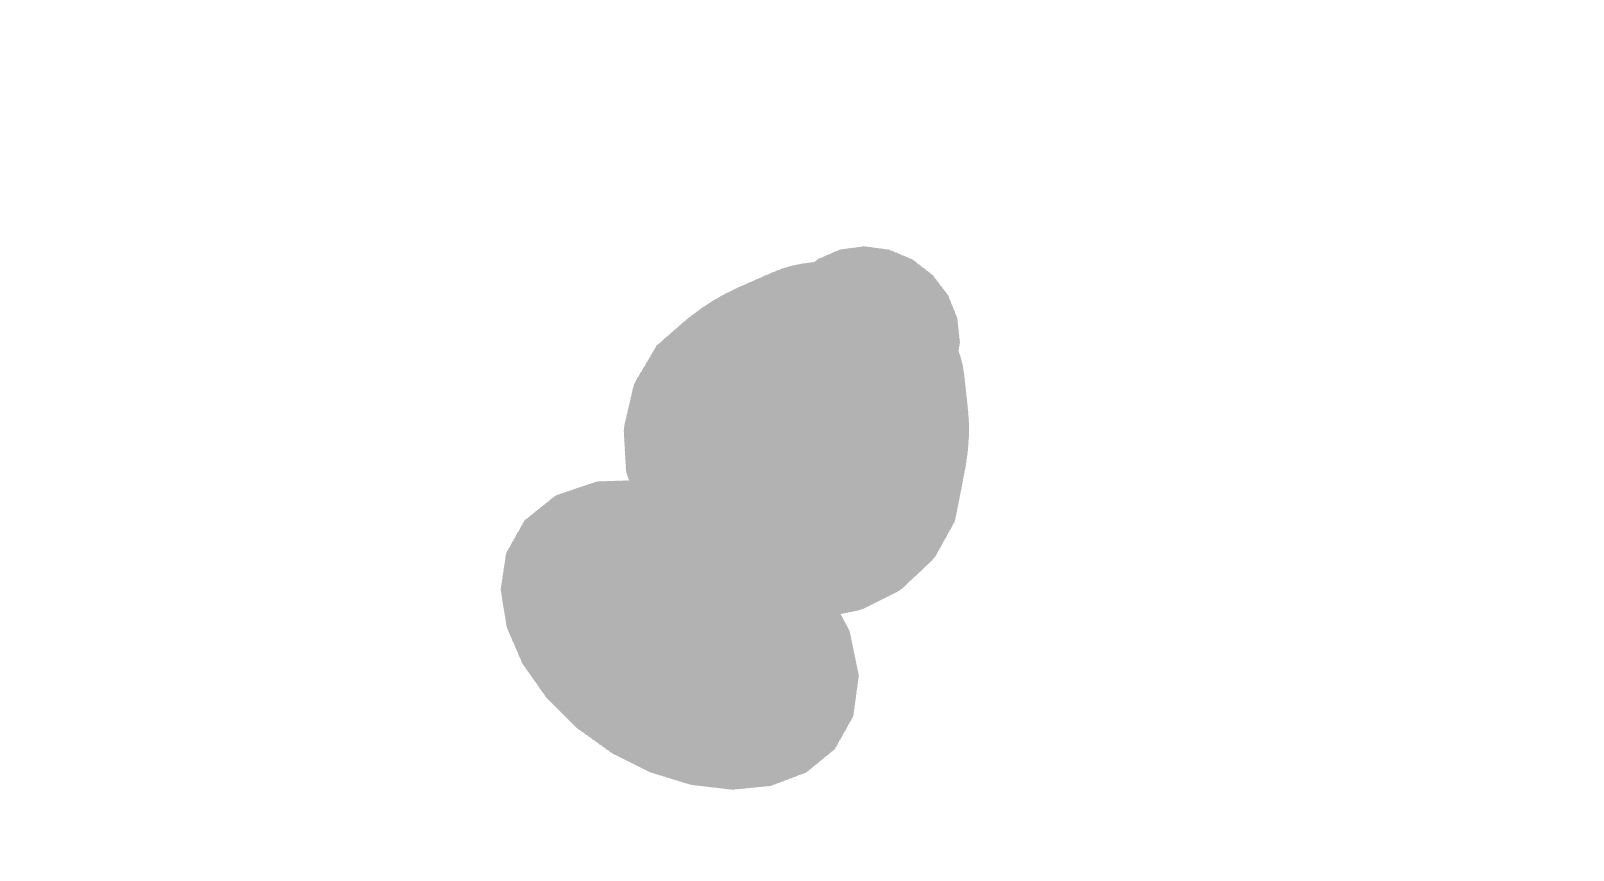

True

In [6]:
mof=o3d.io.read_triangle_mesh("data/vase_0003.off")
print(mof)
o3d.visualization.draw_geometries([mof])
o3d.io.write_triangle_mesh("data/writemesh.obj",mof)

Load a ply point cloud, print it, and render it
geometry::PointCloud with 513398 points.
[[-0.23784727 -0.12832503  0.25600001]
 [-0.2374876  -0.12832503  0.25600001]
 [-0.23712793 -0.12832503  0.25600001]
 ...
 [ 0.40968075  0.25234136  0.49700001]
 [ 0.41037902  0.25234136  0.49700001]
 [ 0.40859592  0.25081816  0.49399999]]


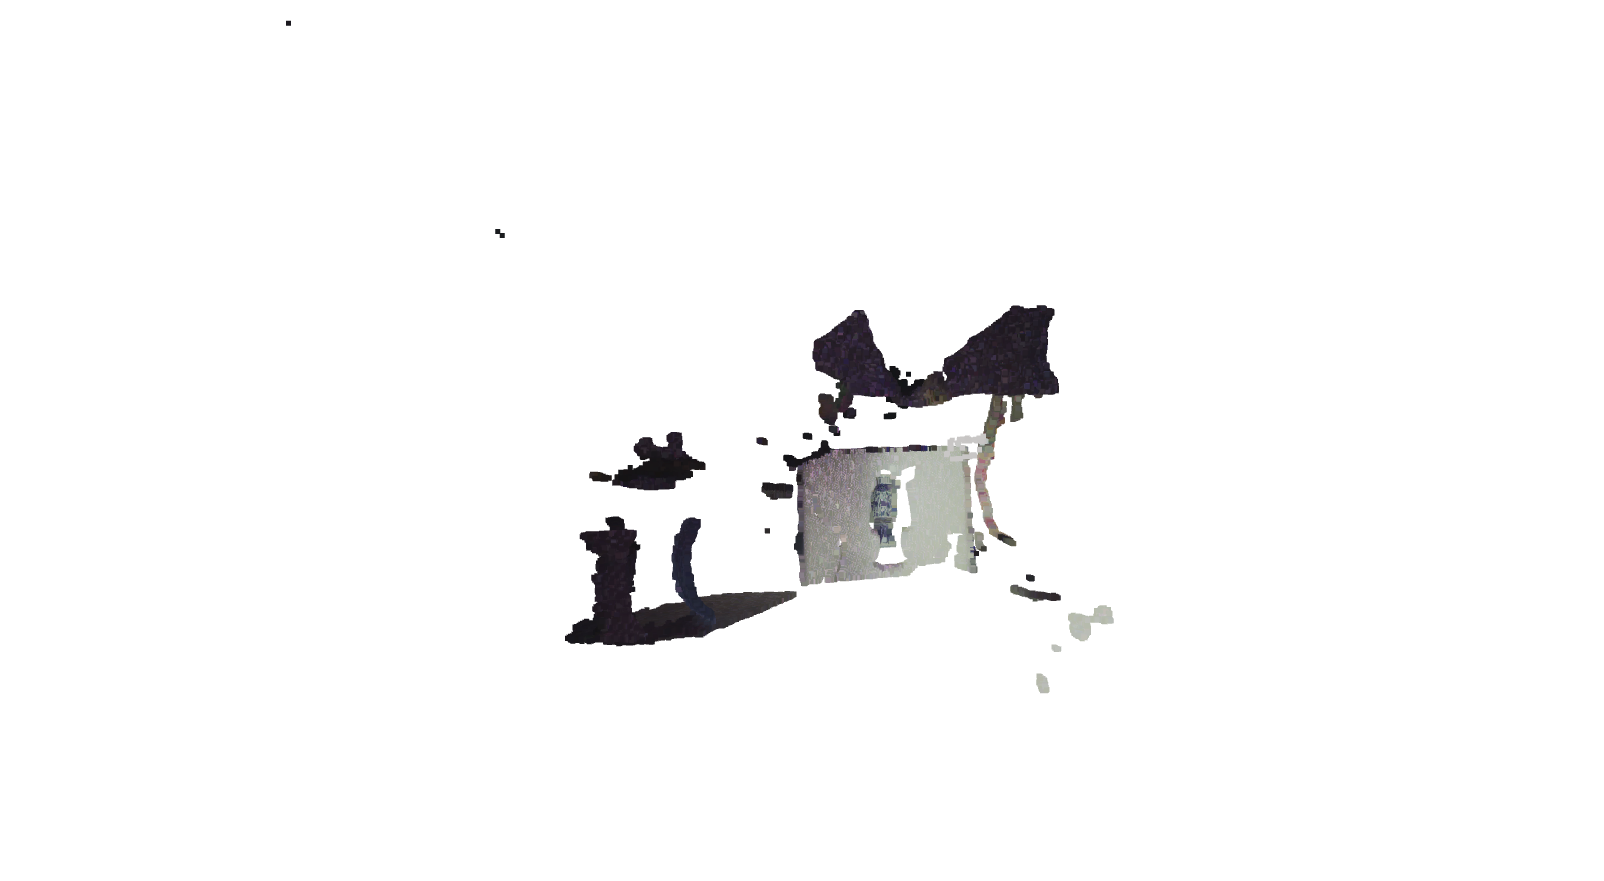

In [11]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud("data/pointcloud-1.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd])

## 条件滤波

In [9]:
bbox = o3d.geometry.AxisAlignedBoundingBox(min_bound=(-0.10, -0.20, 0),
                                               max_bound=(0.30, 0.10, 0.5))
pcd_cropped = pcd.crop(bbox)
o3d.visualization.draw_geometries([pcd_cropped])

## 体素滤波

In [4]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd_cropped.voxel_down_sample(voxel_size=0.002)
print(pcd_cropped)
print(downpcd)
print(np.asarray(downpcd.points))
o3d.visualization.draw_geometries([downpcd])

Downsample the point cloud with a voxel of 0.05
geometry::PointCloud with 322617 points.
geometry::PointCloud with 47797 points.
[[ 0.0900873  -0.07018805  0.3588    ]
 [ 0.094343   -0.13601338  0.38      ]
 [ 0.07753465 -0.20063685  0.461     ]
 ...
 [ 0.32559756  0.12776349  0.4285    ]
 [ 0.31941229  0.12828654  0.43000001]
 [ 0.32951862  0.12859106  0.42899999]]


In [5]:
st,lst=downpcd.remove_statistical_outlier(50,1)
print(st)
o3d.visualization.draw_geometries([st])

geometry::PointCloud with 44988 points.


## 平面分割

In [6]:
plane_model, inliers = st.segment_plane(distance_threshold=0.01,
                                             ransac_n=3,
                                             num_iterations=250)
[a, b, c, d] = plane_model
print(f"Plane model: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")
inlier_cloud = st.select_down_sample(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])

outlier_cloud = st.select_down_sample(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

Plane model: 0.13x + -0.00y + 0.99z + -0.47 = 0


In [7]:
o3d.visualization.draw_geometries([outlier_cloud])

## 半径滤波

In [8]:
print("Radius oulier removal")
cl, ind = outlier_cloud.remove_radius_outlier(nb_points=10, radius=0.2)
print(cl)
o3d.visualization.draw_geometries([cl])

Radius oulier removal
geometry::PointCloud with 5985 points.


In [12]:
o3d.io.write_point_cloud("test_final.pcd", cl)

True